# Mini Proyecto : Aprendizaje Supervisado
**Inteligencia Artificial**

In [424]:
from IPython.core.display import Image, display
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import multivariate_normal, norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Configuración de las figuras matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 12})

### Ejercicio de aprendizaje supervisado (prediciendo mora)
Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como buenos o malos según su riesgo crediticio.

### Carga de datos
El dataset y su descripción se obtiene de la página:
 https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
 


In [425]:
def load_data():
  data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data',
                     delimiter=" ",
                     header=None)
  data.columns=['existingchecking',
                'duration',
                'credithistory',
                'purpose',
                'creditamount',
                'savings',
                'employmentsince',
                'installmentrate',
                'statussex',
                'otherdebtors',
                'residencesince',
                'property',
                'age',
                'otherinstallmentplans',
                'housing',
                'existingcredits',
                'job',
                'peopleliable',
                'telephone',
                'foreignworker',
                'target'
                ]
  data.loc[:,'target'] = data['target'].replace([1,2],[1,0])
  return data

# Ejercicio
---

Como parte del equipo de riesgos de una entidad financiera se le solicita utilizando la base de datos *german*, que desarrolle el mejor modelo que me permita clasificar a los clientes en riesgosos y no riesgosos desde el punto de vista de la probabilidad de caer en mora.

Para esto tenga en cuenta lo siguiente:

1) Realice un análisis explortorio tanto visual como formal y extraiga conclusiones

2) Realice una preparación y preprocesado de los datos de acuerdo a lo observado. Por ej. analice nulos, outliers, codifique de forma adecuado las variables categóricas, analice el desbalanceo de clases, etc.

3) Compare las prestaciones en un conjunto de test de los siguientes clasificadores en términos de área bajo la curva ROC (AUC-ROC) y F1-score:

- Regresión Logística con regularización L2, validando el parámetro $C$ de regularización.
- Random Forest validando tanto el número de estimadores y el máximo número de hojas.
- XGBoost validando el el número de estimadores, la máxima profundidad del arbol y learning_rate.
- Elija algún otro algoritmo si lo considera necesario


**En todos los casos, valide el número de variables a la entrada usando el criterio de información mútua y seleccione rangos de validación adecuados para cada hiperparámetro utilizando Gridsearch y Cross Validation.
Y utilice Pipeline de sklearn para garantizar la ejecución ordenada de los distintos pasos

4) Represente también en una única gráfica la curva ROC de los cuatro clasificadores.

5) Recomiende el mejor clasificador y explique su elección


**Muestre, mediante gráficos y explicaciones acordes, las conclusiones a las que ha arribado durante y luego del aprendizaje.
Documente cada uno de los pasos del análisis para demostrar su entendimiento sobre el tema.**



In [426]:
data = load_data()
print("Cargadas {0:d} observaciones con {1:d} columnas\n".format(len(data), len(data.columns)))

Cargadas 1000 observaciones con 21 columnas


In [427]:
df = data.copy()

In [428]:
df

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,0


# 1. Análisis exploratorio

In [429]:
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataset tiene 1000 filas y 21 columnas


### 1.1 Medidas estadisticas

In [430]:
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [431]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

### 1.2 Nulos

In [432]:
df.isnull().sum()

existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
target                   0
dtype: int64

### 1.3 Outliers

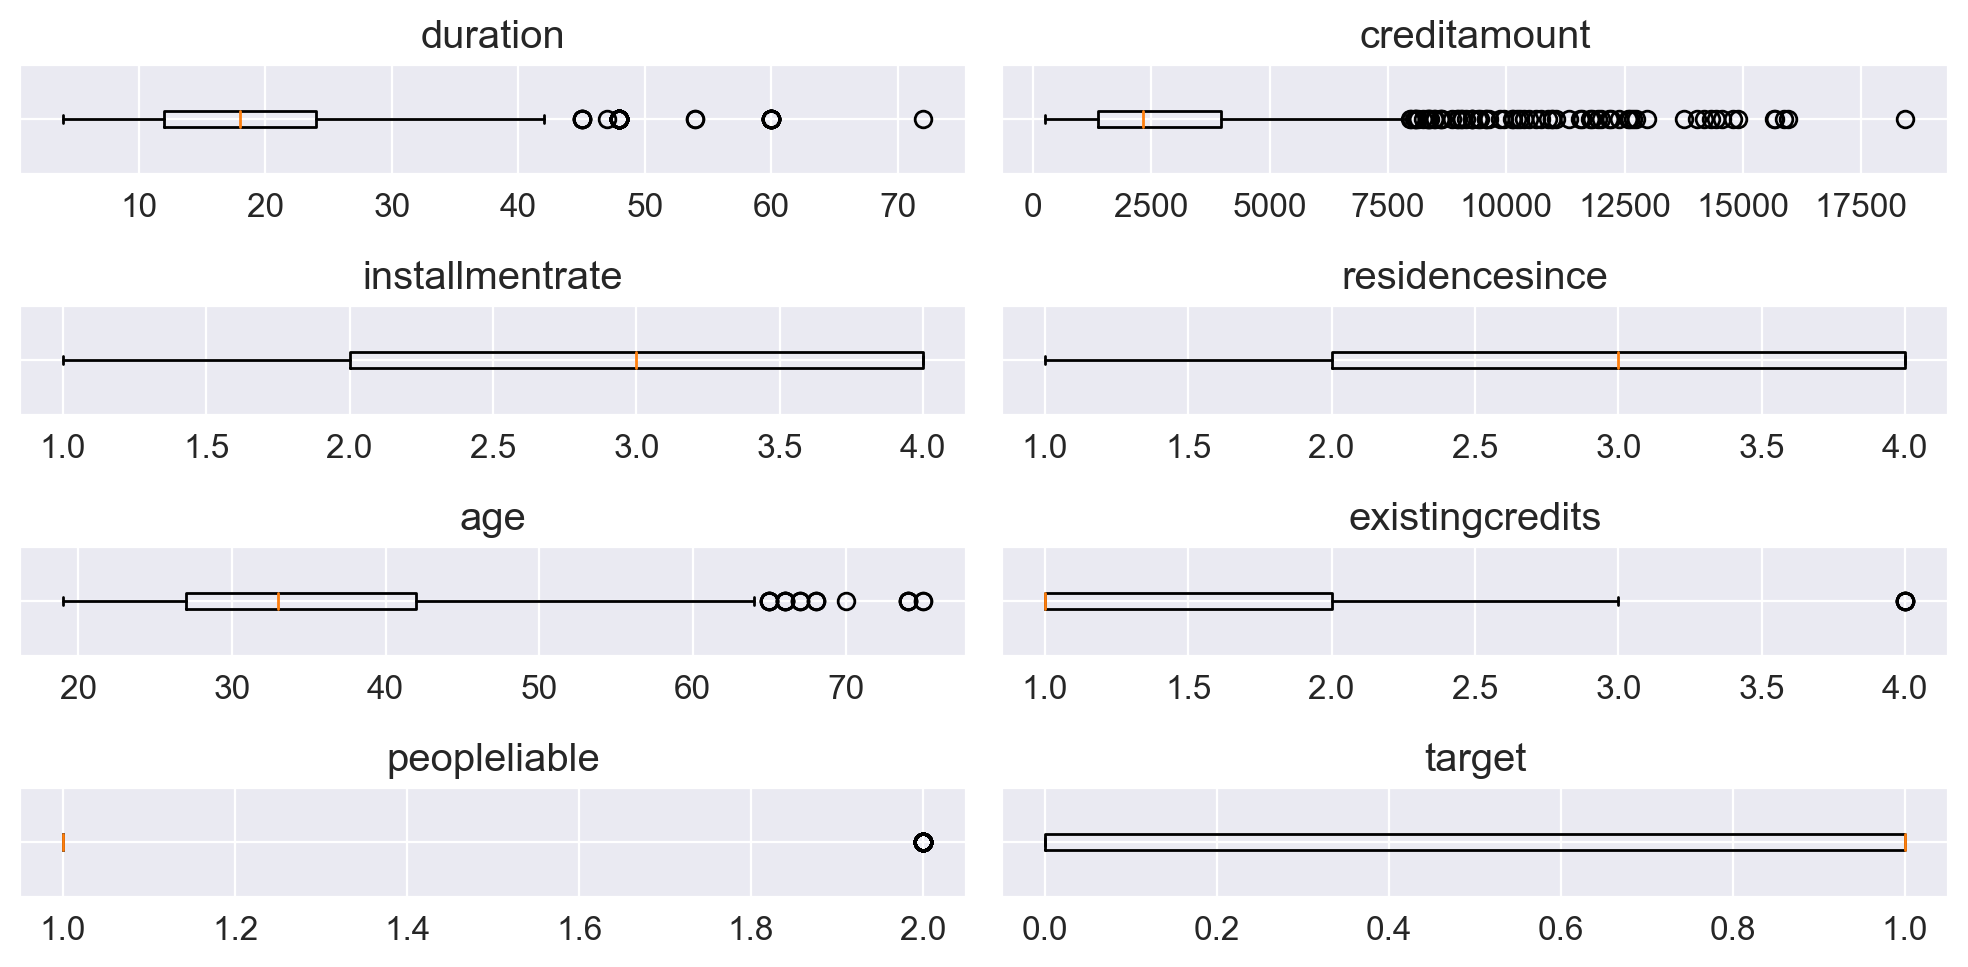

In [433]:
#Numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(4, 2, figsize=(10,5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=False)
    axes[i].set_title(col)
    #remove y axis label
    axes[i].set_yticklabels([])
    
plt.tight_layout()
plt.show()

In [434]:
attributes = {
    "Attribute 1": {
        "type": "qualitative",
        "description": "Status of existing checking account",
        "values": {
            "A11": "< 0 DM",
            "A12": "0 <= ... < 200 DM",
            "A13": ">= 200 DM / salary assignments for at least 1 year",
            "A14": "no checking account"
        }
    },
    "Attribute 2": {
        "type": "numerical",
        "description": "Duration in month"
    },
    "Attribute 3": {
        "type": "qualitative",
        "description": "Credit history",
        "values": {
            "A30": "no credits taken/ all credits paid back duly",
            "A31": "all credits at this bank paid back duly",
            "A32": "existing credits paid back duly till now",
            "A33": "delay in paying off in the past",
            "A34": "critical account/ other credits existing (not at this bank)"
        }
    },
    "Attribute 4": {
        "type": "qualitative",
        "description": "Purpose",
        "values": {
            "A40": "car (new)",
            "A41": "car (used)",
            "A42": "furniture/equipment",
            "A43": "radio/television",
            "A44": "domestic appliances",
            "A45": "repairs",
            "A46": "education",
            "A47": "(vacation - does not exist?)",
            "A48": "retraining",
            "A49": "business",
            "A410": "others"
        }
    },
    "Attribute 5": {
        "type": "numerical",
        "description": "Credit amount"
    },
    "Attribute 6": {
        "type": "qualitative",
        "description": "Savings account/bonds",
        "values": {
            "A61": "< 100 DM",
            "A62": "100 <= ... < 500 DM",
            "A63": "500 <= ... < 1000 DM",
            "A64": ">= 1000 DM",
            "A65": "unknown/ no savings account"
        }
    },
    "Attribute 7": {
        "type": "qualitative",
        "description": "Present employment since",
        "values": {
            "A71": "unemployed",
            "A72": "< 1 year",
            "A73": "1 <= ... < 4 years",
            "A74": "4 <= ... < 7 years",
            "A75": ">= 7 years"
        }
    },
    "Attribute 8": {
        "type": "numerical",
        "description": "Installment rate in percentage of disposable income"
    },
    "Attribute 9": {
        "type": "qualitative",
        "description": "Personal status and sex",
        "values": {
            "A91": "male : divorced/separated",
            "A92": "female : divorced/separated/married",
            "A93": "male : single",
            "A94": "male : married/widowed",
            "A95": "female : single"
        }
    },
    "Attribute 10": {
        "type": "qualitative",
        "description": "Other debtors / guarantors",
        "values": {
            "A101": "none",
            "A102": "co-applicant",
            "A103": "guarantor"
        }
    },
    "Attribute 11": {
        "type": "numerical",
        "description": "Present residence since"
    },
    "Attribute 12": {
        "type": "qualitative",
        "description": "Property",
        "values": {
            "A121": "real estate",
            "A122": "if not A121 : building society savings agreement/ life insurance",
            "A123": "if not A121/A122 : car or other, not in attribute 6",
            "A124": "unknown / no property"
        }
    },
    "Attribute 13": {
        "type": "numerical",
        "description": "Age in years"
    },
    "Attribute 14": {
        "type": "qualitative",
        "description": "Other installment plans",
        "values": {
            "A141": "bank",
            "A142": "stores",
            "A143": "none"
        }
    },
    "Attribute 15": {
        "type": "qualitative",
        "description": "Housing",
        "values": {
            "A151": "rent",
            "A152": "own",
            "A153": "for free"
        }
    },
    "Attribute 16": {
        "type": "numerical",
        "description": "Number of existing credits at this bank"
    },
    "Attribute 17": {
        "type": "qualitative",
        "description": "Job",
        "values": {
            "A171": "unemployed/ unskilled - non-resident",
            "A172": "unskilled - resident",
            "A173": "skilled employee / official",
            "A174": "management/ self-employed/ highly qualified employee/ officer"
        }
    },
    "Attribute 18": {
        "type": "numerical",
        "description": "Number of people being liable to provide maintenance for"
    },
    "Attribute 19": {
        "type": "qualitative",
        "description": "Telephone",
        "values": {
            "A191": "none",
            "A192": "yes, registered under the customers name"
        }
    },
    "Attribute 20": {
        "type": "qualitative",
        "description": "foreign worker",
        "values": {
            "A201": "yes",
            "A202": "no"
        }
    }
}

### 1.4 Reemplazo de variables categoricas
Para mayor entendimiento de las variables, se reemplazarán los valores de las variables categóricas por su descripción.

In [435]:
df_reemplazado = df.copy()
for i, col in zip(attributes, df_reemplazado.columns):
    if attributes[i]['type'] == 'qualitative':
        df_reemplazado[col] = df_reemplazado[col].replace(attributes[i]['values'])
    else:
        pass

In [436]:
df_reemplazado.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,0


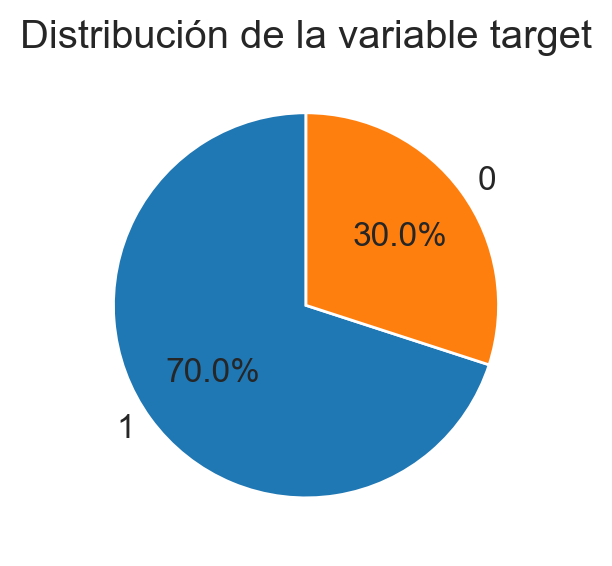

In [437]:
plt.figure(figsize=(3, 3))
plt.pie(df['target'].value_counts(), labels=['1', '0'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de la variable target')
plt.tight_layout()
plt.show()

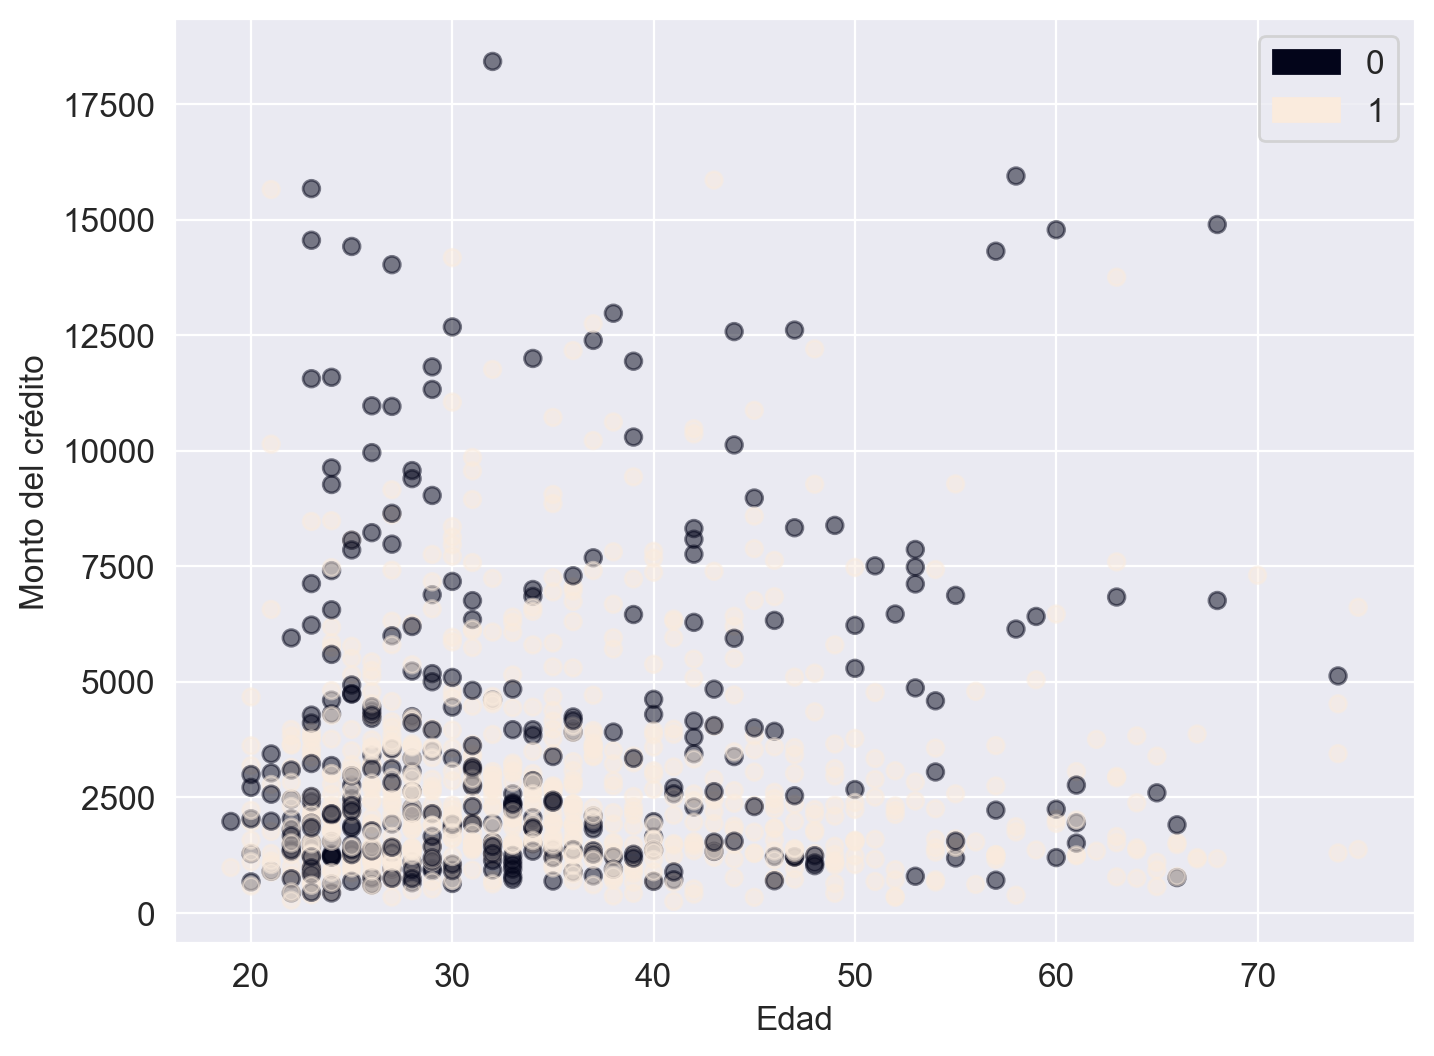

In [438]:
import matplotlib.patches as mpatches

scatter = plt.scatter(df_reemplazado['age'], df_reemplazado['creditamount'],c=df_reemplazado['target'], alpha=0.5)

handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(i)), label=f'{i}') for i in range(2)]
plt.legend(handles=handles)

plt.xlabel('Edad')
plt.ylabel('Monto del crédito')
plt.show()

# Pasar variables categoricas bien, diferenciar entre nominales y ordinales

## Variables ordinales

In [439]:
df_ordinales = df_reemplazado.copy()
df_ordinales['savings'] = df_ordinales['savings'].replace({'unknown/ no savings account': 0, '< 100 DM': 1, '100 <= ... < 500 DM': 2, '500 <= ... < 1000 DM': 3, '>= 1000 DM': 4})
df_ordinales['employmentsince'] = df_ordinales['employmentsince'].replace({'unemployed': 0, '< 1 year': 1, '1 <= ... < 4 years': 2, '4 <= ... < 7 years': 3, '>= 7 years': 4})
df_ordinales['housing'] = df_ordinales['housing'].replace({'rent': 0, 'for free': 1, 'own': 2})
df_ordinales['job'] = df_ordinales['job'].replace({'unemployed/ unskilled - non-resident': 0, 'unskilled - resident': 1, 'skilled employee / official': 2, 'management/ self-employed/ highly qualified employee/ officer': 3})
df_ordinales['foreignworker'] = df_ordinales['foreignworker'].replace({'yes': 1, 'no': 0})
df_ordinales['credithistory'] = df_ordinales['credithistory'].replace({'critical account/ other credits existing (not at this bank)': 0, 'delay in paying off in the past': 1, 'existing credits paid back duly till now': 2, 'all credits at this bank paid back duly': 3, 'no credits taken/ all credits paid back duly': 4})

## Variables nominales

In [440]:
from sklearn.preprocessing import OneHotEncoder

#Variables categoricas
categorical_cols = df_ordinales.select_dtypes(include=['object']).columns

encoder = OneHotEncoder()         
encoded = encoder.fit_transform(df_ordinales[categorical_cols]).toarray()

encoded_df_categorical = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols)) #Creo un dataframe con las variables categoricas codificadas

In [441]:
# Variables numericas
numerical_cols = df_ordinales.select_dtypes(include=[np.number]).columns

encoded_df_numerical = df_ordinales[numerical_cols]

#Concateno los dataframes
df_ordinales_final = pd.concat([encoded_df_categorical, encoded_df_numerical], axis=1)

df_ordinales_final.head()

,existingchecking_0 <= ... < 200 DM,existingchecking_< 0 DM,existingchecking_>= 200 DM / salary assignments for at least 1 year,existingchecking_no checking account,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,...,employmentsince,installmentrate,residencesince,age,housing,existingcredits,job,peopleliable,foreignworker,target
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,67,2,2,2,1,1,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,22,2,1,2,1,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,2,3,49,2,1,1,2,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,2,4,45,1,1,2,2,1,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,3,4,53,1,2,2,2,1,0


# Modelos

In [442]:
X = df_ordinales_final.drop('target', axis=1)
y = df_ordinales_final['target']

In [461]:
def pipe_encode_then_model(model, param_grid):
    if model == 'logistic':
        model_pipe = LogisticRegression()
    elif model == 'random_forest':
        model_pipe = RandomForestClassifier()
    elif model == 'xgboost':
        model_pipe = XGBClassifier()
    elif model == 'lgbm':
        model_pipe = LGBMClassifier(verbose=-1)
    else:
        print('Model not found')
    # Define pipeline for encoding categorical variables
    categorical_pipe = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Apply categorical_pipe to categorical columns
    preprocessor_for_categorical = ColumnTransformer(
        transformers=[
            ('cat', categorical_pipe, categorical_cols)
        ], remainder='passthrough'  # passthrough numerical columns without any changes
    )
    
    # Define pipeline for standardizing all variables (original numerical and new numerical from encoding)
    preprocessing = Pipeline(steps=[
        ('preprocessor_for_categorical', preprocessor_for_categorical),
        ('scaler', StandardScaler())
    ])
    
    # Append classifier to preprocessing pipeline
    final_pipe = Pipeline(steps=[
        ('preprocessing', preprocessing),
        (model, model_pipe)
    ])
    
    grid_search = GridSearchCV(estimator= final_pipe, param_grid = param_grid, scoring = 'f1', cv= 5, verbose=1)
    return grid_search.fit(X_train, y_train)

In [444]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

## Regresion Logistica
Regresión Logística con regularización L2, validando el parámetro $C$ de regularización.

In [446]:
#logistica
param_grid_log = {'logistic__penalty' : ['l2'],'logistic__C': [0.01, 0.1, 1, 10, 100], 'logistic__solver': ['lbfgs', 'liblinear']}

mejor_log = pipe_encode_then_model('logistic', param_grid_log).best_estimator_
mejor_log

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor_for_categorical',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', StandardScaler())])),
                ('logistic', LogisticRegression(C=0.1))])

In [447]:
mejor_log.fit(X_train, y_train)
y_pred = mejor_log.predict(X_test)

evaluate(mejor_log, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[126 120]
 [ 60 494]]
ACCURACY SCORE:
0.7750
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.677419    0.804560     0.775    0.740990      0.765464
recall       0.512195    0.891697     0.775    0.701946      0.775000
f1-score     0.583333    0.845890     0.775    0.714612      0.765154
support    246.000000  554.000000     0.775  800.000000    800.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 28  26]
 [ 15 131]]
ACCURACY SCORE:
0.7950
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.651163    0.834395     0.795    0.742779      0.784922
recall      0.518519    0.897260     0.795    0.707889      0.795000
f1-score    0.577320    0.864686     0.795    0.721003      0.787097
support    54.000000  146.000000     0.795  200.000000    200.000000


## Random Forest

Random Forest validando tanto el <u>número de estimadores</u> y el <u>máximo número de hojas</u>.

In [448]:
#logistica
param_grid_rf = {
    'random_forest__n_estimators': [10, 50, 100, 200],
    'random_forest__max_leaf_nodes': [5, 15,30, 50]}

mejor_rf = pipe_encode_then_model('random_forest', param_grid_rf).best_estimator_
mejor_rf

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor_for_categorical',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', StandardScaler())])),
                ('random_forest',
                 RandomForestClassifier(max_leaf_nodes=30, n_estimators=200))])

In [449]:
mejor_rf.fit(X_train, y_train)
y_pred = mejor_rf.predict(X_test)

evaluate(mejor_rf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[143 103]
 [  2 552]]
ACCURACY SCORE:
0.8688
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.986207    0.842748   0.86875    0.914477      0.886862
recall       0.581301    0.996390   0.86875    0.788845      0.868750
f1-score     0.731458    0.913151   0.86875    0.822305      0.857281
support    246.000000  554.000000   0.86875  800.000000    800.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 17  37]
 [  7 139]]
ACCURACY SCORE:
0.7800
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.708333    0.789773      0.78    0.749053      0.767784
recall      0.314815    0.952055      0.78    0.633435      0.780000
f1-score    0.435897    0.863354      0.78    0.649626      0.747941
support    54.000000  146.000000      0.78  200.000000    200.000000


## XGBoost
XGBoost validando el el <u>número de estimadores</u>, la <u>máxima profundidad del arbol</u> y <u>learning_rate</u>

In [450]:
# Parametros
param_grid_xgboost = {
    'xgboost__n_estimators': [50, 100, 200,300],
    'xgboost__max_depth': [5, 15, 30, 50],
    'xgboost__learning_rate': [0.001,0.01, 0.1]}

mejor_xg = pipe_encode_then_model('xgboost', param_grid_xgboost).best_estimator_
mejor_xg

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor_for_categorical',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', StandardScaler())])),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=15, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [451]:
mejor_xg.fit(X_train, y_train)
y_pred = mejor_xg.predict(X_test)

evaluate(mejor_xg, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[245   1]
 [  0 554]]
ACCURACY SCORE:
0.9988
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.998198   0.99875    0.999099      0.998752
recall       0.995935    1.000000   0.99875    0.997967      0.998750
f1-score     0.997963    0.999098   0.99875    0.998531      0.998749
support    246.000000  554.000000   0.99875  800.000000    800.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 28  26]
 [ 17 129]]
ACCURACY SCORE:
0.7850
CLASSIFICATION REPORT:
                   0           1  accuracy  macro avg  weighted avg
precision   0.622222    0.832258     0.785    0.72724      0.775548
recall      0.518519    0.883562     0.785    0.70104      0.785000
f1-score    0.565657    0.857143     0.785    0.71140      0.778442
support    54.000000  146.000000     0.785  200.00000    200.000000


## LightGBM

In [459]:
from lightgbm import LGBMClassifier

In [462]:
param_grid_lgbm = {
    'lgbm__max_depth': [5, 15, 30, 50],
    'lgbm__n_estimators': [50, 100, 200, 300]}

mejor_lgbm = pipe_encode_then_model('lgbm', param_grid_lgbm).best_estimator_
mejor_lgbm

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('preprocessor_for_categorical',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   Pipeline(steps=[('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   Index([], dtype='object'))])),
                                 ('scaler', StandardScaler())])),
                ('lgbm',
                 LGBMClassifier(max_depth=5, n_estimators=50, verbose=-1))])

In [467]:
mejor_lgbm.fit(X_train, y_train)
y_pred = mejor_lgbm.predict(X_test)

evaluate(mejor_lgbm, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[181  65]
 [ 11 543]]
ACCURACY SCORE:
0.9050
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.942708    0.893092     0.905    0.917900      0.908349
recall       0.735772    0.980144     0.905    0.857958      0.905000
f1-score     0.826484    0.934596     0.905    0.880540      0.901351
support    246.000000  554.000000     0.905  800.000000    800.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 25  29]
 [ 12 134]]
ACCURACY SCORE:
0.7950
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.675676    0.822086     0.795    0.748881      0.782555
recall      0.462963    0.917808     0.795    0.690386      0.795000
f1-score    0.549451    0.867314     0.795    0.708382      0.781491
support    54.000000  146.000000     0.795  200.000000    200.000000


# F1 y ROC
### F1 scores

In [463]:
#get f1
from sklearn.metrics import f1_score

f1_log = f1_score(y_test, mejor_log.predict(X_test))
f1_rf = f1_score(y_test, mejor_rf.predict(X_test))
f1_xg = f1_score(y_test, mejor_xg.predict(X_test))
f1_lgbm = f1_score(y_test, mejor_lgbm.predict(X_test))

print(f'F1 Logistic Regression: {f1_log:.2f}')
print(f'F1 Random Forest: {f1_rf:.2f}')
print(f'F1 XGBoost: {f1_xg:.2f}')
print(f'F1 LightGBM: {f1_lgbm:.2f}')


F1 Logistic Regression: 0.86
F1 Random Forest: 0.86
F1 XGBoost: 0.86
F1 LightGBM: 0.87


### ROC-curves

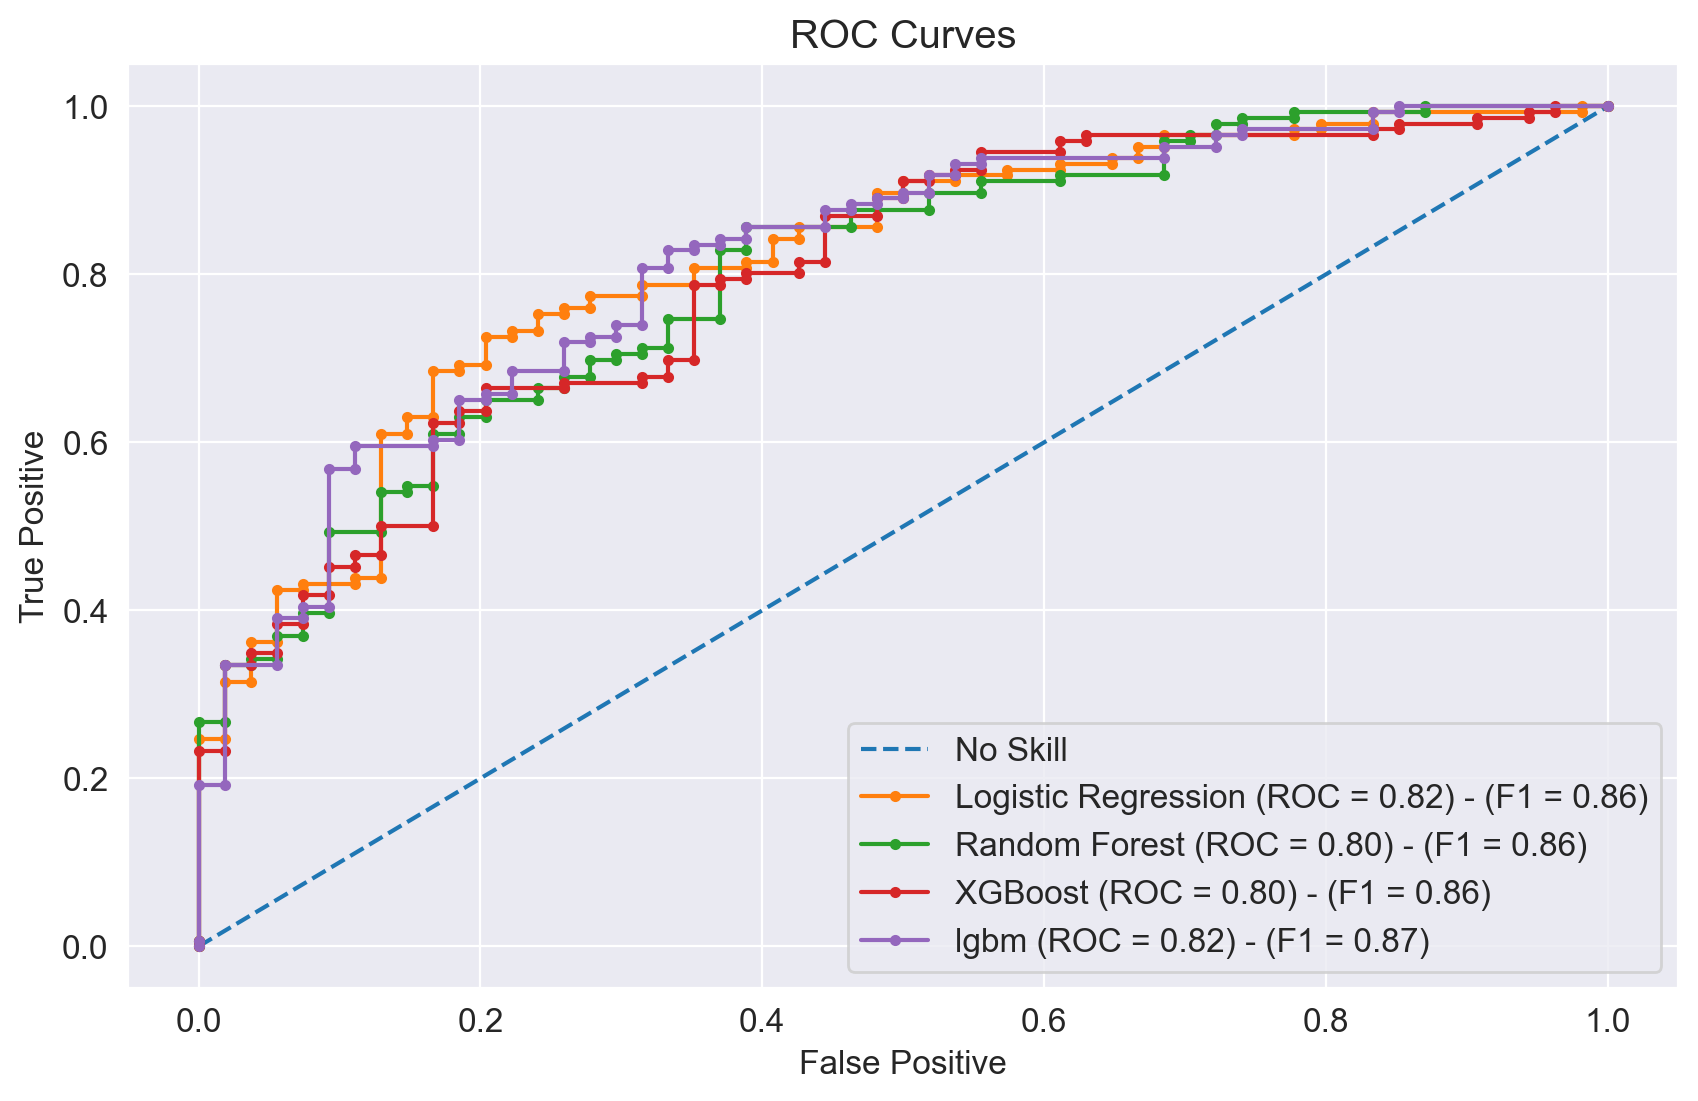

In [465]:
#plot all roc curves in one plot
from sklearn.metrics import roc_curve, roc_auc_score

models = [mejor_log, mejor_rf, mejor_xg, mejor_lgbm]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'lgbm']

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
for model, name in zip(models, model_names):
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, marker='.', label=f'{name} (ROC = {auc:.2f}) - (F1 = {f1:.2f})')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curves')
plt.legend()
plt.show()


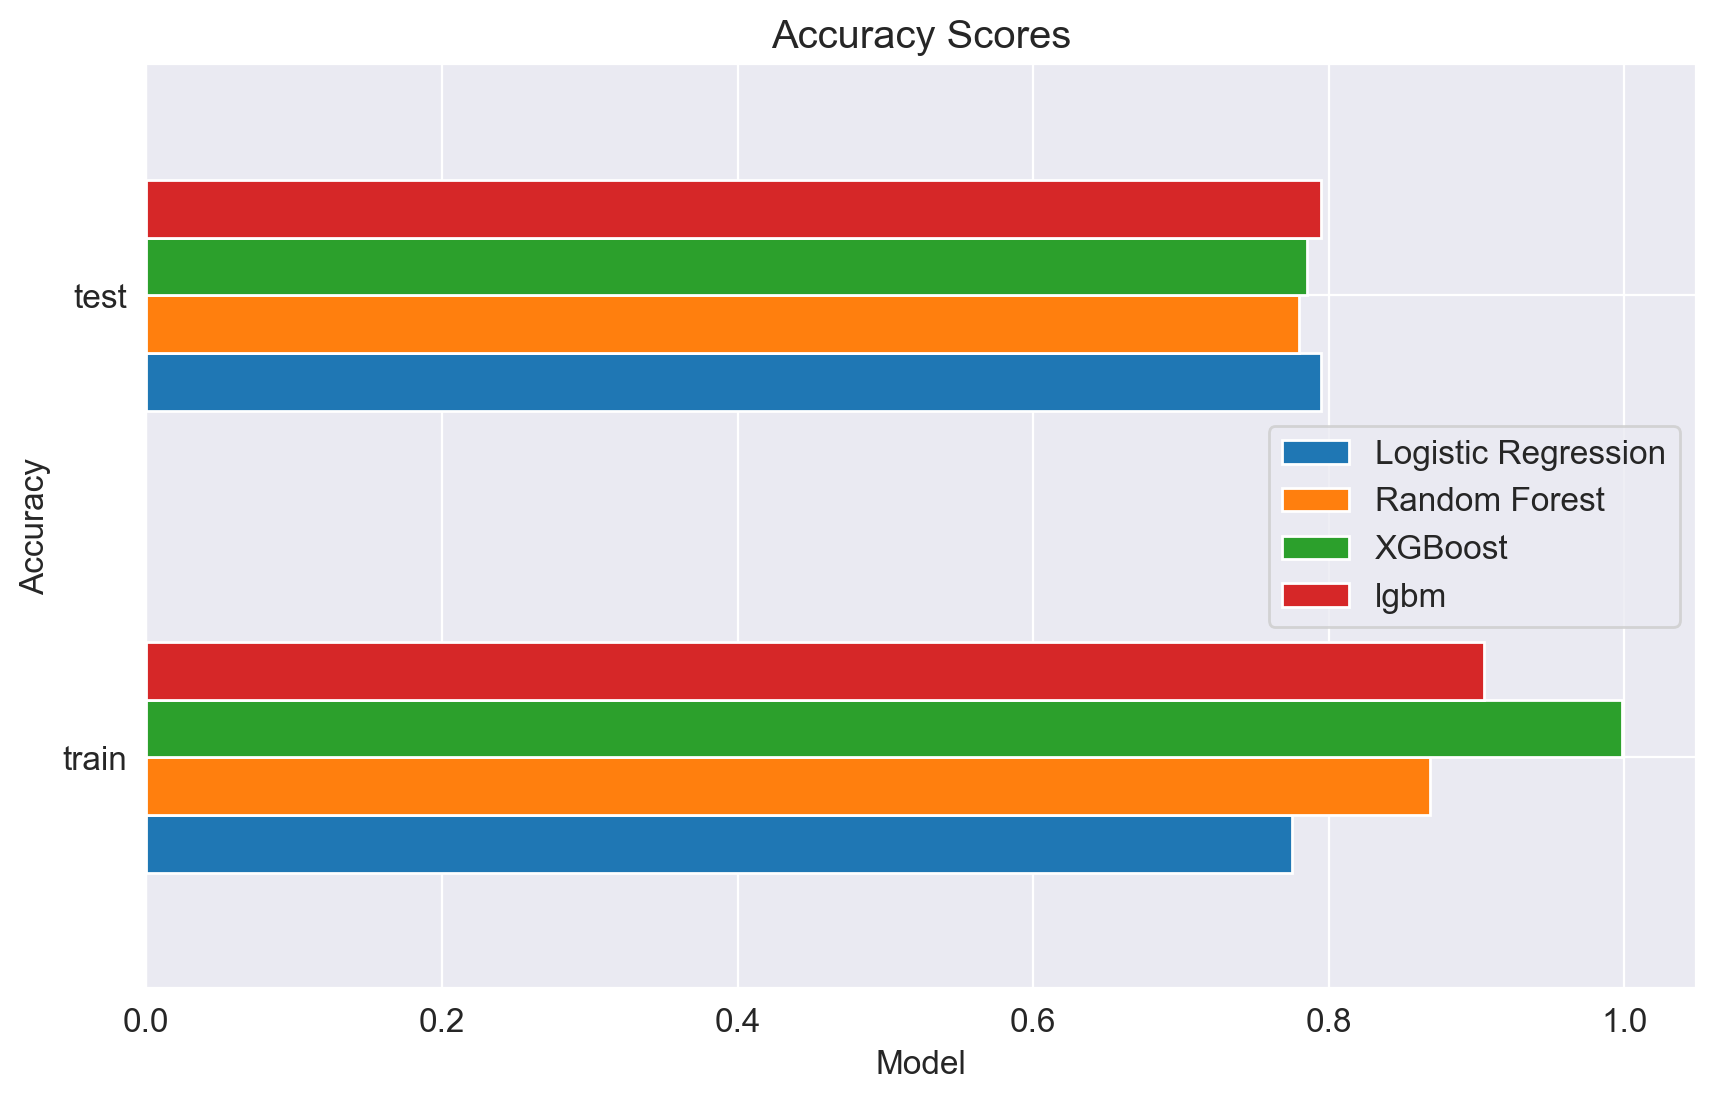

In [466]:
#Get accuracy from all models
from sklearn.metrics import accuracy_score

acc_scores = {}

#Get accuracy train and accuracy test from all models

for model, name in zip(models, model_names):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_scores[name] = {'train': acc_train, 'test': acc_test}
    
pd.DataFrame(acc_scores).plot(kind='barh', title='Accuracy Scores', xlabel='Model', ylabel='Accuracy', figsize=(10, 6))
plt.show()